# Phase 2 Group Project:  Success in Seattle

Presented by:  Mustafa Furkan Kolanci, Jared Mitchell, and Theodore Brandon

Date:  10/8/2021

Instructor:  Angelica Spratley

github link:  https://github.com/theobigdog/DS_083021_Phase2_Project

### Business Understanding 

Our stakeholder is a real-estate company with a new sub-division, "Seattle's Best Realty", who is looking to expand its market to King County (the greater Seattle area), starting in 2016. They need a reliable prediction metric for house prices and would like to know which features of houses are most important. Our task is to provide them with a linear regression model that will infer features that are most important in determining housing prices in this area. Given our inferences, the object is to allow for future research to predict housing prices in this market, allowing for the most competitive pricing and profit. 

### Data Understanding 

Import necessary modules for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate, ShuffleSplit
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

Import dataset

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

Let's look at some properties of the dataset

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data Preperation

It appears that `waterfront`,`view` and `yr_renovated` columns have some missing values. Let's resolve those issues.

In [6]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Less than 1% of listed homes have a waterfront access, so these are infrequent enough cases that we will fill missing values with the mode, "NO".

In [7]:
df['waterfront'].fillna("NO",inplace=True)

In [8]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

More than 90% of listed homes have no view.  With only 63 listings (<1%) missing, we will use the mode to fill the missing values.

In [9]:
df['view'].fillna("NONE",inplace=True)

In [10]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Very few homes from this list have been renovated.  The 0-values may have never been renovated, but we can't know that for sure.  Since there are so many 0-values and also many missing entries, we have decided to disregard this column.

In [11]:
df.drop('yr_renovated', axis=1,inplace=True)

Analyzing `grade`, it was observed that "3 Poor" has only one entry in this list.  When samples are next split into train and test sets, only one of them gets the single "3 Poor" entry.  Because `grade` is later encoded to have separate columns for each category, this results in mismatched columns at the end of the process, which necessitated dropping this single entry:

In [12]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [13]:
df = df[df['grade'] != "3 Poor"]

## The prediction target is price
### Now that we've trimmed and cleaned the data, let's make a population density plot to see how things look:

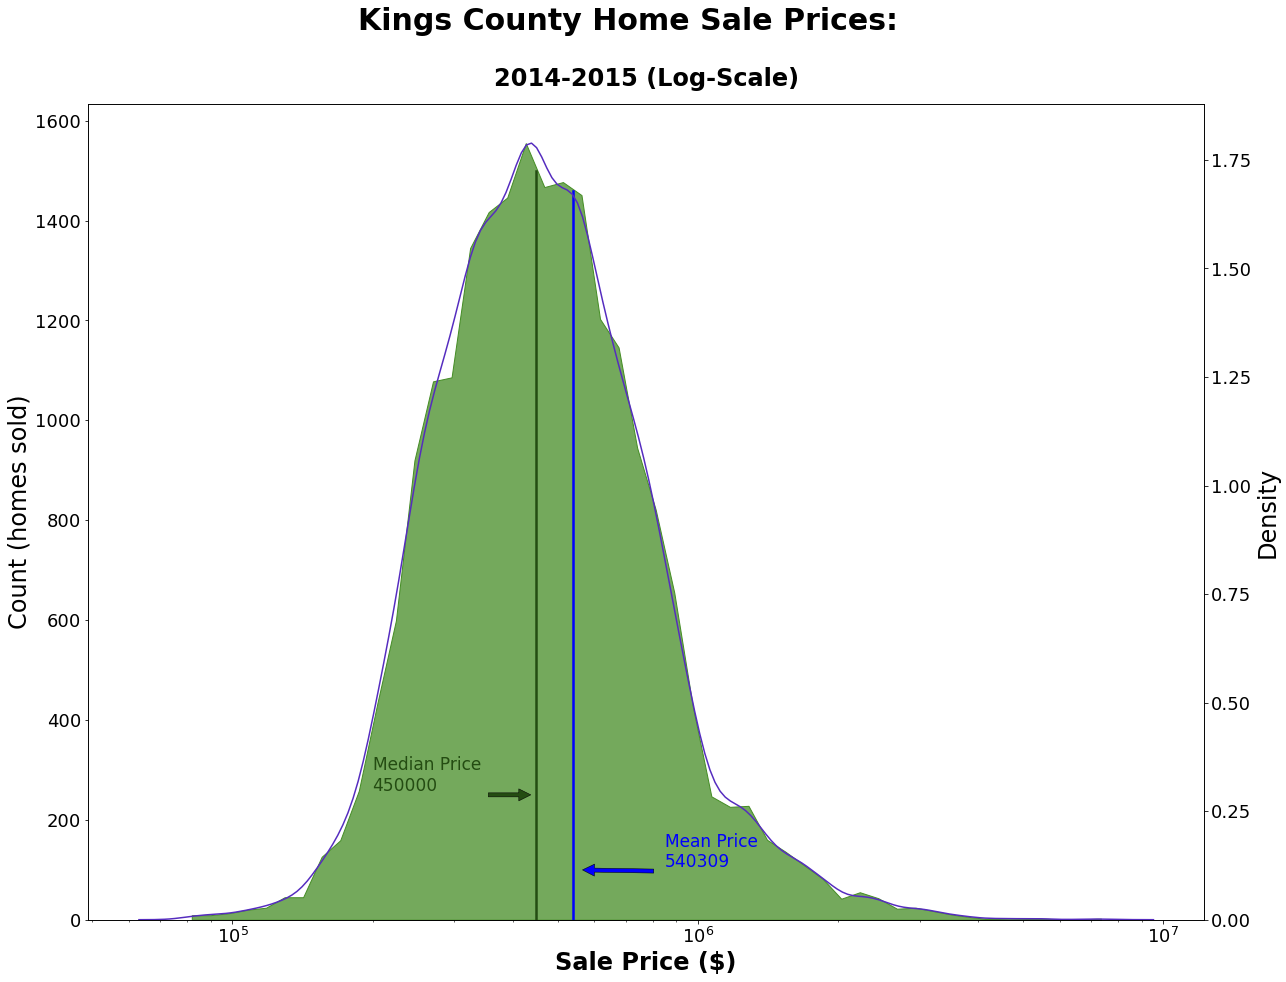

In [14]:
x=df['price']
x_mean = np.mean(x)
x_median = np.median(x)
fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle('Kings County Home Sale Prices:', fontsize=30, fontweight='bold',y=0.97)
sns.histplot(x, ax=ax, bins=50, color="#458D25", log_scale=True, element='poly')
plt.plot([x_mean,x_mean],[0,1460], color="blue",linewidth=2.5)
ax.annotate(('Mean Price\n' + str(int(x_mean))), xy=(x_mean,100), xytext=(850000,105), \
            arrowprops=dict(facecolor='blue', shrink=0.1, linewidth=0.5), fontsize=17,color="blue")
plt.plot([x_median,x_median],[0,1500], color="#244C12",linewidth=2.5)
ax.annotate(('Median Price\n' + str(int(x_median))), xy=(x_median,250), xytext=(200000,258), \
            arrowprops=dict(facecolor='#244C12', shrink=0.1, linewidth=0.5), fontsize=17,color="#244C12")
plt.xlabel('Sale Price ($)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=18)
plt.ylabel('Count (homes sold)', fontsize=24,x=.95)
plt.yticks(fontsize=18)
ax2 = ax.twinx()
sns.kdeplot(x, ax=ax2, color="#552cbf", log_scale=True)
plt.title('2014-2015 (Log-Scale)', fontsize=24, fontweight='bold',y=1.015)
plt.yticks(fontsize=18)
plt.ylabel('Density', fontsize=24,x=1.1)
plt.savefig('../Images/Home_Sales_Density.png', dpi=600);

# Train/Test Split

It is time to split the data into training and test sets. This way, we can train our model using the training set and use the test set to see how successful our model is. 

In [15]:
y = df['price']
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

## Assumptions of Linear Regression

In order to run linear regression, there are some conditions we need to check for and resolve.

### Linear Relationship

There should be a linear relationship between independent and dependent variables. This can be checked by using scatterplots and looking at correlations.

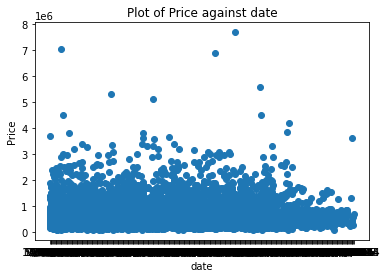

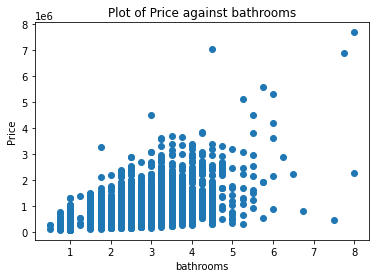

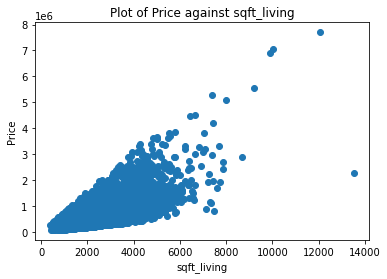

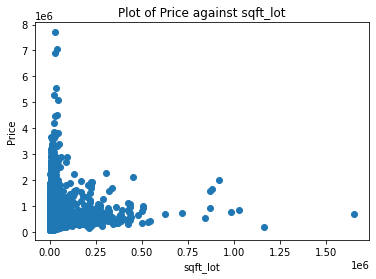

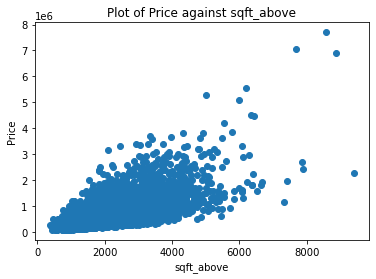

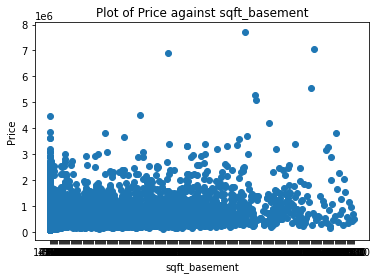

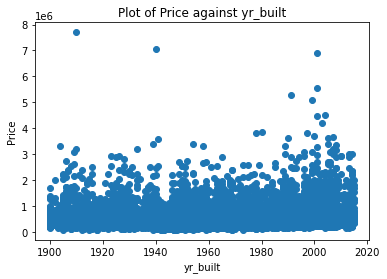

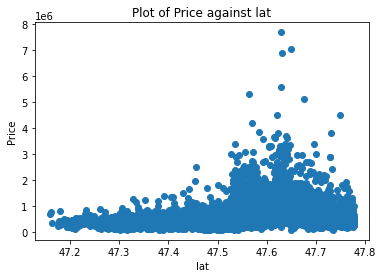

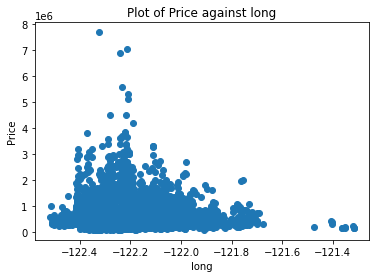

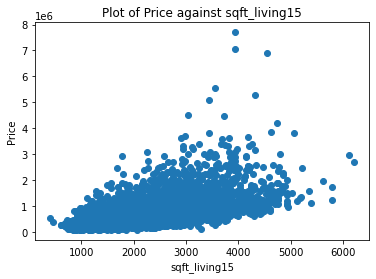

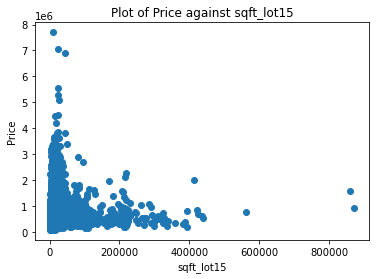

In [16]:
features = X_train.columns

for x in features:
    categorical = ['id','bedrooms','floors','zipcode','waterfront','view','condition','grade']
    if x not in categorical:
        plt.scatter(X_train[x], y_train)
        plt.title(f'Plot of Price against {x}')
        plt.xlabel(x)
        plt.ylabel('Price')
        plt.show()

It appears that `sqft_living`,`sqft_above`, `sqft_living15` and `bathrooms` columns have a somewhat linear relationship with `price`.

Next, let's check correlations of independent (predictor) variables with the dependent (target) variable from highest to lowest:

In [17]:
temp = pd.concat([X_train, y_train], axis=1)
temp.corr().abs()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.704316
sqft_above       0.610020
sqft_living15    0.587717
bathrooms        0.525220
bedrooms         0.307032
lat              0.300476
floors           0.264536
sqft_lot         0.093266
sqft_lot15       0.081103
zipcode          0.049768
yr_built         0.046877
id               0.022987
long             0.020220
Name: price, dtype: float64

The table above agrees with the linearity observations from the scatterplot. The highest four correlations are `sqft_living`, `sqft_above`, `bathrooms` and `sqft_living15`.

### Low Multicollinearity

In linear regression models, independent (predictor) variables should not be highly correlated with each other. This can be evaluated by inspecting the correlations between them. Let's do that by generating a heatmap.

In [18]:
X_train_heatmap = X_train.copy()

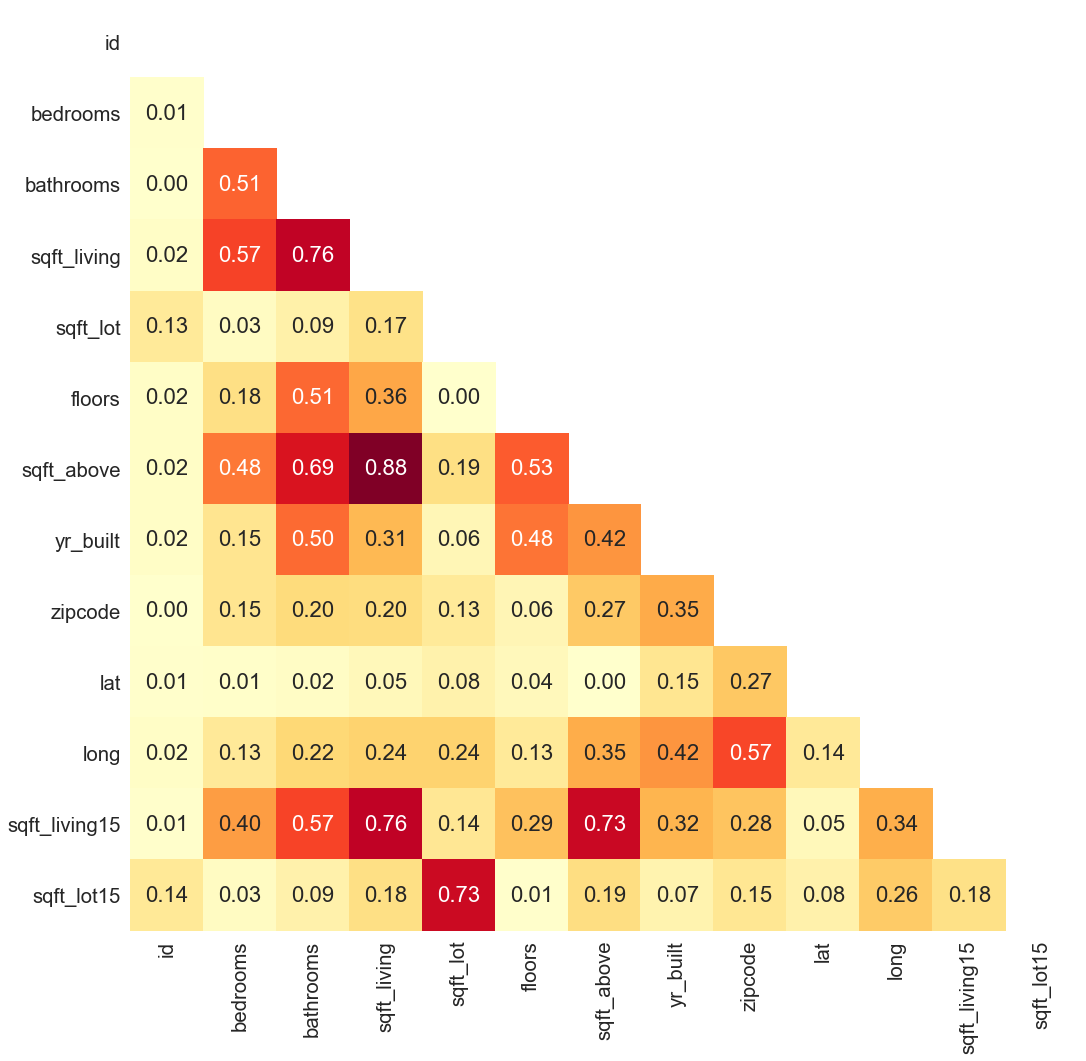

In [19]:
plt.figure(figsize=(17,17))
sns.set(font_scale=1.85)
mask = np.triu(np.ones_like(X_train_heatmap.corr(), dtype=bool))
with sns.axes_style("white"):
    sns.heatmap(X_train_heatmap.corr().abs(), annot=True, fmt='.2f', cmap="YlOrRd",mask=mask, cbar=False)
sns.set(font_scale=1)
plt.savefig('../Images/Correlation_Heatmap.png', dpi=600)

In [20]:

# fig, ax = plt.subplots(figsize=(20,20))
# sns.heatmap(X_train.corr().abs(),annot=True, ax=ax);

Correlations higher than 0.7 are considered to be highly correlated, so let's look at which predictor features are highly correlated with each other.

In [21]:
corr_mtx = abs(X_train.corr())
filtered_corr_mtx = corr_mtx.stack().drop_duplicates()
filtered_corr_mtx[(filtered_corr_mtx.values>=0.7) & (filtered_corr_mtx.values<1)]

bathrooms    sqft_living      0.757178
sqft_living  sqft_above       0.878845
             sqft_living15    0.759404
sqft_lot     sqft_lot15       0.725444
sqft_above   sqft_living15    0.733433
dtype: float64

## Feature Engineering

Now, we need to convert `object` types in the dataset into numbers so that we can incorporate categorical variables into the linear regression model. 

`date` column is of type `object`. The cell below makes a new column `date_num` which is type `int` which keeps the year and month information. 

In [22]:
date_num = []
for date in X_train['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_train['date_num'] = date_num 
X_train.drop(['date'],axis=1, inplace=True);

`sqft_basement` column is also of type `object`. Let's convert that to a number type as well

In [23]:
X_train['sqft_basement'].value_counts()

0.0       9634
?          354
700.0      166
600.0      164
500.0      152
          ... 
2240.0       1
2350.0       1
516.0        1
2190.0       1
2250.0       1
Name: sqft_basement, Length: 280, dtype: int64

There are many 0 values, which likely means no basement. We'll  assume that the `?` values have no basements as well, so we'll fill them with 0.

In [24]:
basement_train = X_train[["sqft_basement"]]
missing_indicator = MissingIndicator("?")
missing_indicator.fit(basement_train)
basement_missing_train = missing_indicator.transform(basement_train)
X_train["basement_?"] = basement_missing_train
zero = float(0)
X_train = X_train.replace("?",int(zero))
X_train['sqft_basement'] = pd.to_numeric(X_train['sqft_basement'], downcast="float")
X_train['sqft_basement'] = X_train['sqft_basement'].astype(float)

### Encoding Categorical Variables

#### Waterfront

In [25]:
X_train['waterfront'].value_counts()

NO     16083
YES      114
Name: waterfront, dtype: int64

`waterfront` is a categorical variable with two categories. Therefore, we will use the `OrdinalEncoder` to encode it.

In [26]:
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
X_train['waterfront'] = waterfront_encoded_train

#### View

In [27]:
X_train['view'].value_counts()

NONE         14597
AVERAGE        741
GOOD           379
FAIR           241
EXCELLENT      239
Name: view, dtype: int64

`view` is a categorical variable with multiple categories. Therefore, we will use the `OneHotEncoder` to encode it.

In [28]:
view_train = X_train[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_train)
view_encoded_train = ohe.transform(view_train)
view_encoded_train = pd.DataFrame(view_encoded_train, columns=ohe.categories_[0], index=X_train.index)
X_train.drop("view", axis=1, inplace=True)
X_train = pd.concat([X_train, view_encoded_train],axis=1)

#### Condition

In [29]:
X_train['condition'].value_counts()

Average      10498
Good          4250
Very Good     1298
Fair           129
Poor            22
Name: condition, dtype: int64

`condition` is also a categorical variable with multiple categories. Therefore, we will use the `OneHotEncoder` to encode it.

In [30]:
condition_train = X_train[['condition']]
ohe.fit(condition_train)
condition_encoded_train = ohe.transform(condition_train)
condition_encoded_train = pd.DataFrame(condition_encoded_train, columns=ohe.categories_[0],index=X_train.index)
X_train.drop('condition', axis=1, inplace=True)
X_train = pd.concat([X_train, condition_encoded_train], axis=1)

#### Grade

In [31]:
X_train['grade'].value_counts()

7 Average        6687
8 Good           4521
9 Better         1992
6 Low Average    1528
10 Very Good      879
11 Excellent      303
5 Fair            190
12 Luxury          69
4 Low              17
13 Mansion         11
Name: grade, dtype: int64

`grade` is also a categorical variable with multiple categories. Therefore, we will use the `OneHotEncoder` to encode it.

In [32]:
grade_train = X_train[['grade']]
ohe.fit(grade_train)
grade_encoded_train = ohe.transform(grade_train)
grade_encoded_train = pd.DataFrame(grade_encoded_train, columns=ohe.categories_[0], index=X_train.index)
X_train.drop("grade", axis=1, inplace=True)
X_train = pd.concat([X_train, grade_encoded_train], axis=1)

In [33]:
temp = pd.concat([X_train, y_train], axis=1)
temp.corr().abs()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.704316
sqft_above       0.610020
sqft_living15    0.587717
bathrooms        0.525220
NONE             0.362929
11 Excellent     0.358449
10 Very Good     0.331450
sqft_basement    0.321315
7 Average        0.315845
bedrooms         0.307032
lat              0.300476
EXCELLENT        0.289793
12 Luxury        0.289124
floors           0.264536
waterfront       0.254173
13 Mansion       0.241533
9 Better         0.236007
6 Low Average    0.209853
GOOD             0.195409
AVERAGE          0.155402
FAIR             0.093636
sqft_lot         0.093266
5 Fair           0.084918
sqft_lot15       0.081103
Very Good        0.052540
Fair             0.050631
zipcode          0.049768
yr_built         0.046877
Good             0.030984
4 Low            0.030169
id               0.022987
Poor             0.021630
long             0.020220
Average          0.009765
basement_?       0.005450
date_num         0.004742
8 Good           0.001511
Name: price,

In [34]:
corr_mtx = abs(X_train.corr())
filtered_corr_mtx = corr_mtx.stack().drop_duplicates()
filtered_corr_mtx[(filtered_corr_mtx.values>=0.7) & (filtered_corr_mtx.values<1)]

bathrooms    sqft_living      0.757178
sqft_living  sqft_above       0.878845
             sqft_living15    0.759404
sqft_lot     sqft_lot15       0.725444
sqft_above   sqft_living15    0.733433
Average      Good             0.809504
dtype: float64

# FINALLY DONE!! with cleaning anyways....

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.72929428, 0.69960158, 0.7438692 ])

In [37]:
X_train_Full_heatmap = X_train.copy()

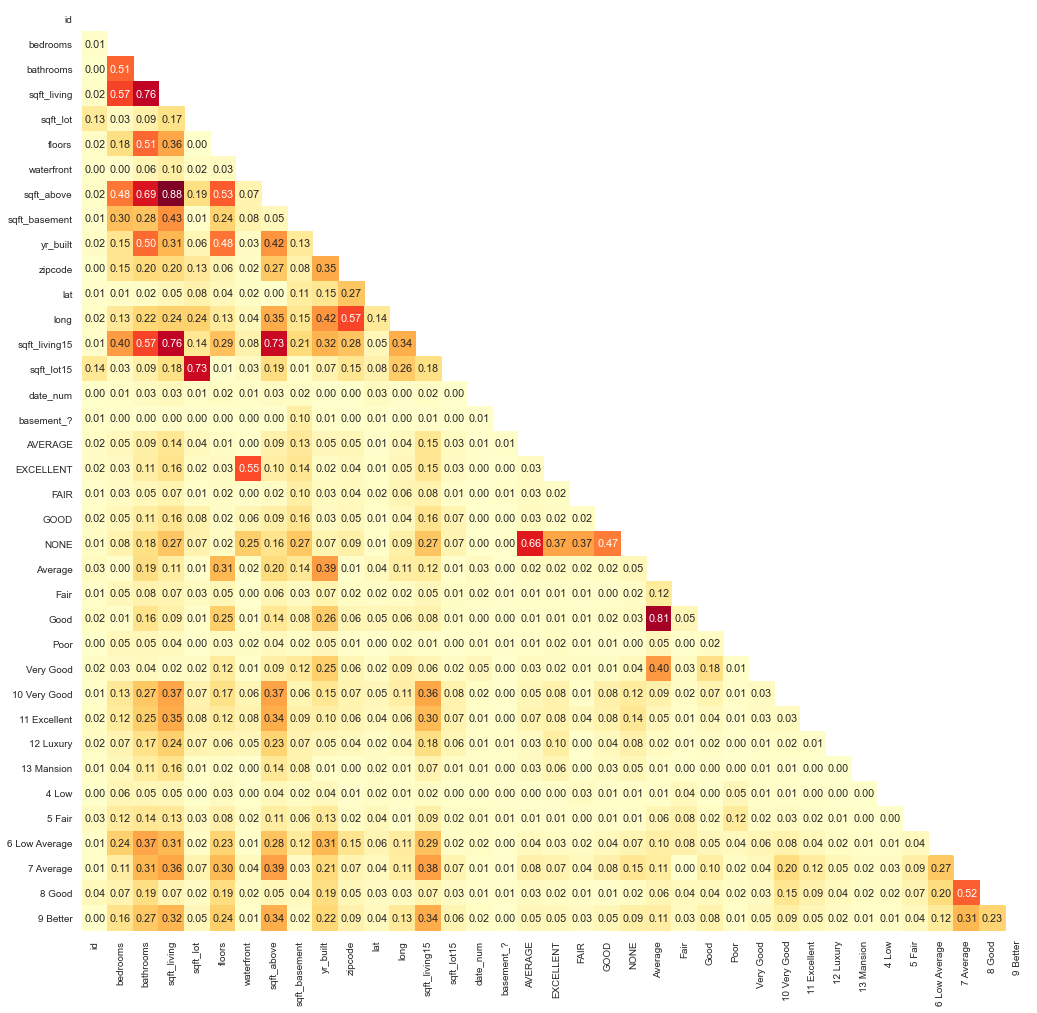

In [38]:
plt.figure(figsize=(17,17))
sns.set(font_scale=0.9)
mask = np.triu(np.ones_like(X_train_Full_heatmap.corr(), dtype=bool))
with sns.axes_style("white"):
    sns.heatmap(X_train_Full_heatmap.corr().abs(), annot=True, fmt='.2f', cmap="YlOrRd",mask=mask, cbar=False)
sns.set(font_scale=1)
plt.savefig('../Images/Full_Correlation_Heatmap.png', dpi=600)

In [39]:
column_names = {
    "id" : "ID",
    "bedrooms" : "# Bedrooms",
    "bathrooms" : "# Bathrooms",
    "sqft_living" : "ft$^2$ Living",
    "floors" : "# Floors",
    "waterfront" : "Waterfront Access",
    "sqft_above" : "ft$^2$ Above Ground",
    "yr_built" : "Year Built",
    "zipcode" : "Zipcode",
    "lat" : "Latitude",
    "long" : "Longitude",
    "sqft_living15" : 'ft$^2$ "Living 15"',
    "sqft_lot15" : 'ft$^2$ "Lot 15"',
    "date_num" : "Date(Year_Month)",
    "basement_?" : "Basement Tracking",
    "AVERAGE" : "Average View",
    "EXCELLENT" : "Excellent View",
    "FAIR" : "Fair View",
    "GOOD" : "Good View",
    "NONE" : "No View",
    "Average" : "Average Condition",
    "Fair" : "Fair Condition",
    "Good" : "Good Condition",
    "Poor" : "Poor Condition",
    "Very Good" : "Very Good Condition",
    "10 Very Good" :  "Grade: Very Good",
    "11 Excellent" :  "Grade: Excellent",
    "12 Luxury" : "Grade: Luxury",
    "13 Mansion" : "Grade: Mansion",
    "4 Low" : "Grade: Low",
    "5 Fair" : "Grade: Fair",
    "6 Low Average" : "Grade: Low Average",
    "7 Average" : "Grade: Average",
    "8 Good" : "Grade: Good",
    "9 Better" : "Grade: Better"
}

In [40]:
X_df = X_train.copy()

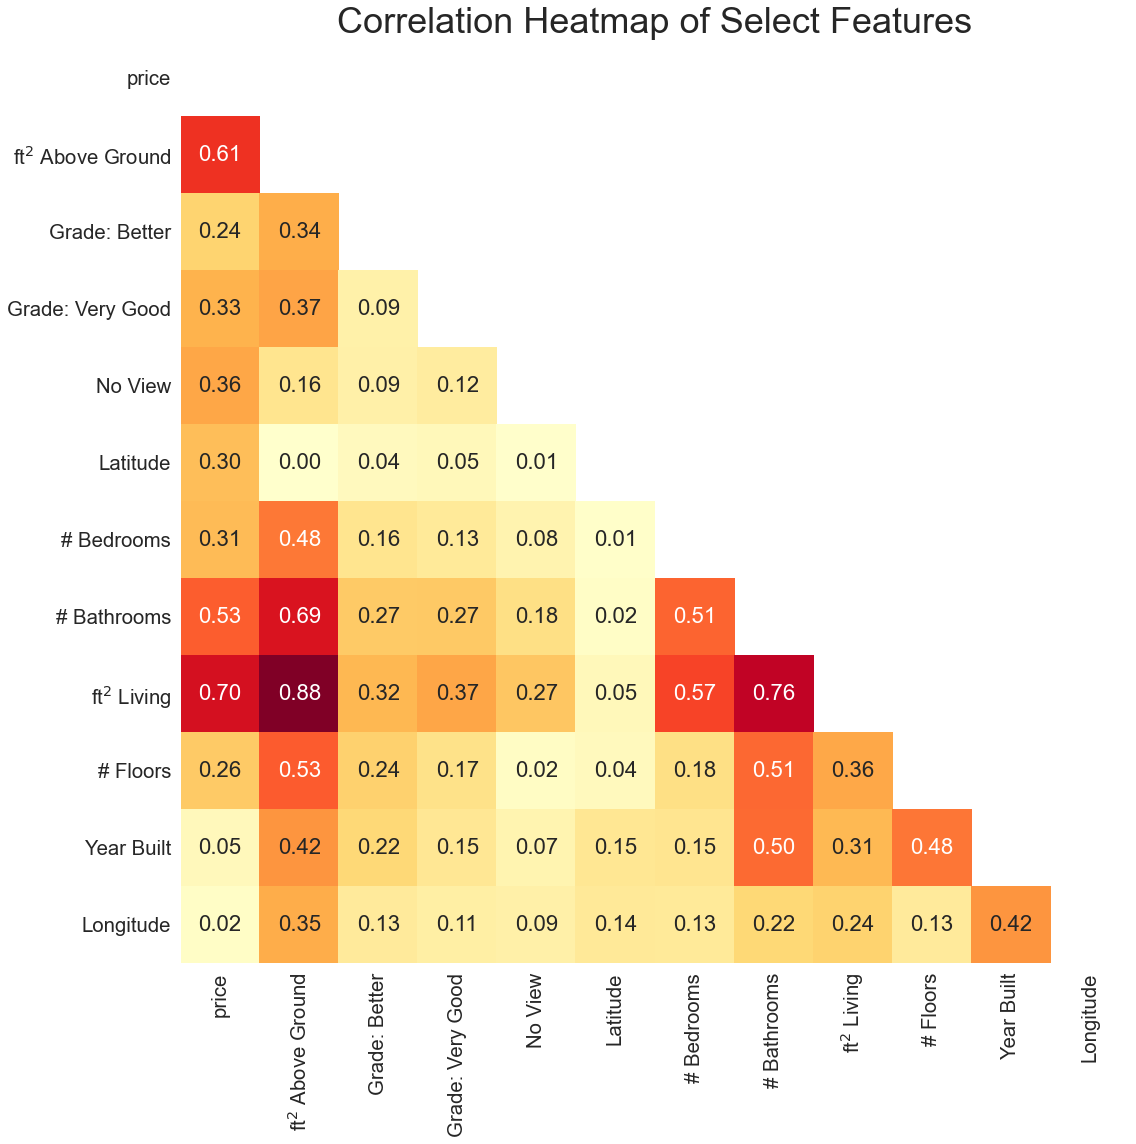

In [41]:
our_cats = pd.DataFrame(X_df[['sqft_above','9 Better','10 Very Good','NONE','lat']])
others = pd.DataFrame(X_df[['bedrooms','bathrooms','sqft_living','floors','yr_built','long']])
X_train_applic_heatmap = pd.concat([y_train, our_cats, others], axis=1)
pd.concat([X_train, y_train], axis=1)
X_train_applic_heatmap=X_train_applic_heatmap.rename(column_names, axis=1)
plt.figure(figsize=(17,17))
sns.set(font_scale=1.85)
mask = np.triu(np.ones_like(X_train_applic_heatmap.corr(), dtype=bool))
with sns.axes_style("white"):
    sns.heatmap(X_train_applic_heatmap.corr().abs(), annot=True, fmt='.2f', cmap="YlOrRd",mask=mask, cbar=False)
sns.set(font_scale=1)
plt.title("Correlation Heatmap of Select Features", fontsize=36)
plt.savefig('../Images/Applic_Correlation_Heatmap.png', dpi=600)

## Run Test data now too, just to see

In [42]:
date_num = []
for date in X_test['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_test['date_num'] = date_num
X_test.drop(['date'],axis=1, inplace=True);

basement_test = X_test[["sqft_basement"]]
missing_indicator.fit(basement_test)
basement_missing_test = missing_indicator.transform(basement_test)

X_test["basement_?"] = basement_missing_test
zero = float(0)
X_test = X_test.replace("?",int(zero))
X_test['sqft_basement'] = pd.to_numeric(X_test['sqft_basement'], downcast="float")
X_test['sqft_basement'] = X_test['sqft_basement'].astype(float)

waterfront_test = X_test[['waterfront']]
encoder_waterfront.fit(waterfront_test)
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)
waterfront_encoded_test = waterfront_encoded_test.flatten()
X_test['waterfront'] = waterfront_encoded_test

# encoder_basement_missing.fit(basement_missing_test)
# basement_missing_encoded_test = encoder_basement_missing.transform(basement_missing_test)
# basement_missing_encoded_test = basement_missing_encoded_test.flatten()
# X_test['basement_?'] = basement_missing_encoded_test

view_test = X_test[['view']]
ohe.fit(view_test)
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(view_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test],axis=1)

condition_test = X_test[['condition']]
ohe.fit(condition_test)
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(condition_encoded_test, columns=ohe.categories_[0],index=X_test.index)
X_test.drop('condition', axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

grade_test = X_test[['grade']]
ohe.fit(grade_test)
grade_encoded_test = ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(grade_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("grade", axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)

In [43]:
# plt.figure(figsize=(15,15))
# sns.heatmap(X_train.corr().abs(), annot=True);

In [44]:
scalar = StandardScaler()
new_X_train = scalar.fit_transform(X_train)
scaled_X_train = pd.DataFrame(data=new_X_train, columns=X_train.columns, index=X_train.index)

In [45]:
new_X_test = scalar.fit_transform(X_test)
scaled_X_test = pd.DataFrame(data=new_X_test, columns=X_test.columns, index=X_test.index)

In [46]:
scaled_X_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
count,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,...,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04,1.619700e+04
mean,-1.066012e-16,-4.255272e-17,2.303111e-16,2.298724e-16,1.052851e-17,1.272195e-17,-3.509503e-18,5.439730e-17,2.588258e-17,2.411906e-15,...,5.922286e-17,-8.773757e-18,-6.141630e-18,1.842489e-17,-8.773757e-19,1.754751e-18,1.469604e-17,-3.575306e-17,1.623145e-17,-3.421765e-17
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,...,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.583592e+00,-2.547562e+00,-2.097443e+00,-1.855044e+00,-3.479724e-01,-9.253427e-01,-8.419163e-02,-1.710838e+00,-6.493099e-01,-2.415543e+00,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,-8.385431e-01,-6.222576e-01,-3.744761e-01
25%,-8.524955e-01,-4.021420e-01,-4.798538e-01,-7.110010e-01,-2.413238e-01,-9.253427e-01,-8.419163e-02,-7.159740e-01,-6.493099e-01,-6.813575e-01,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,-8.385431e-01,-6.222576e-01,-3.744761e-01
50%,-2.309314e-01,-4.021420e-01,1.671818e-01,-1.821512e-01,-1.795900e-01,4.593126e-03,-8.419163e-02,-2.724804e-01,-6.493099e-01,1.347297e-01,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,-8.385431e-01,-6.222576e-01,-3.744761e-01
75%,9.500072e-01,6.705678e-01,4.906996e-01,5.085915e-01,-1.050745e-01,9.345290e-01,-8.419163e-02,5.102258e-01,6.028869e-01,8.828096e-01,...,-2.395485e-01,-1.380717e-01,-6.540851e-02,-2.606913e-02,-3.241419e-02,-1.089486e-01,-3.227464e-01,1.192545e+00,1.607051e+00,-3.744761e-01
max,1.844573e+00,3.177915e+01,7.608091e+00,1.235915e+01,3.909067e+01,3.724336e+00,1.187767e+01,9.124789e+00,8.753550e+00,1.494875e+00,...,4.174520e+00,7.242613e+00,1.528853e+01,3.835954e+01,3.085068e+01,9.178637e+00,3.098408e+00,1.192545e+00,1.607051e+00,2.670398e+00


In [47]:
scaled_X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,-1.298411,1.743278,1.784771,2.257034,0.066844,0.934529,-0.084192,2.855947,-0.649310,1.120835,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,1.637477,-1.474852,-1.450407,-1.315401,-0.266075,-0.925343,-0.084192,-1.111522,-0.649310,-0.715361,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,-1.129725,0.670568,0.167182,0.130842,-0.082115,0.934529,-0.084192,0.494644,-0.649310,-0.137299,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,0.541600,-0.402142,0.490700,0.422249,-0.203959,0.934529,-0.084192,0.818274,-0.649310,1.052828,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,-0.439186,0.670568,0.490700,2.127520,-0.157443,0.934529,-0.084192,1.189850,2.242126,1.222846,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398


# Here it is: the first Model Fit!

In [48]:
model.fit(scaled_X_train, y_train)
model.score(scaled_X_test, y_test)

-3.571592215080424e+19

In [49]:
full_comp = pd.concat([scaled_X_train, y_train], axis=1)
full_comp = full_comp[['price'] + [col for col in full_comp.columns if col != 'price']]

In [50]:
scaled_X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,-1.298411,1.743278,1.784771,2.257034,0.066844,0.934529,-0.084192,2.855947,-0.649310,1.120835,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,1.637477,-1.474852,-1.450407,-1.315401,-0.266075,-0.925343,-0.084192,-1.111522,-0.649310,-0.715361,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,-1.129725,0.670568,0.167182,0.130842,-0.082115,0.934529,-0.084192,0.494644,-0.649310,-0.137299,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,0.541600,-0.402142,0.490700,0.422249,-0.203959,0.934529,-0.084192,0.818274,-0.649310,1.052828,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,-0.439186,0.670568,0.490700,2.127520,-0.157443,0.934529,-0.084192,1.189850,2.242126,1.222846,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,-1.506657,-0.402142,1.137735,1.253299,-0.239962,0.934529,-0.084192,1.741220,-0.649310,1.120835,...,4.174520,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
11826,0.752682,0.670568,-0.479854,1.134577,-0.062549,-0.925343,-0.084192,0.626493,1.217602,-0.681357,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
14741,0.544753,0.670568,-0.479854,-0.851308,0.140069,-0.925343,-0.084192,-0.596111,-0.649310,-0.069292,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
9819,-1.436653,-0.402142,0.490700,-0.335410,3.169973,0.934529,-0.084192,-0.023165,-0.649310,0.950817,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476


In [51]:
full_comp

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13856,1890000.0,-1.298411,1.743278,1.784771,2.257034,0.066844,0.934529,-0.084192,2.855947,-0.649310,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,435000.0,1.637477,-1.474852,-1.450407,-1.315401,-0.266075,-0.925343,-0.084192,-1.111522,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,336000.0,-1.129725,0.670568,0.167182,0.130842,-0.082115,0.934529,-0.084192,0.494644,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,583800.0,0.541600,-0.402142,0.490700,0.422249,-0.203959,0.934529,-0.084192,0.818274,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,495000.0,-0.439186,0.670568,0.490700,2.127520,-0.157443,0.934529,-0.084192,1.189850,2.242126,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,1050000.0,-1.506657,-0.402142,1.137735,1.253299,-0.239962,0.934529,-0.084192,1.741220,-0.649310,...,4.174520,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
11826,585000.0,0.752682,0.670568,-0.479854,1.134577,-0.062549,-0.925343,-0.084192,0.626493,1.217602,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
14741,229950.0,0.544753,0.670568,-0.479854,-0.851308,0.140069,-0.925343,-0.084192,-0.596111,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
9819,435000.0,-1.436653,-0.402142,0.490700,-0.335410,3.169973,0.934529,-0.084192,-0.023165,-0.649310,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476


In [52]:
full_comp_test = pd.concat([scaled_X_test, y_test], axis=1)
full_comp_test = full_comp_test[['price'] + [col for col in full_comp_test.columns if col != 'price']]

In [53]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp.corr().abs(), annot=True)
# plt.savefig('Allcomparison.png', dpi=600);

In [54]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp_test.corr().abs(), annot=True)
# plt.savefig('Allcomparison_test.png', dpi=600);

In [55]:
full_rename = full_comp.copy()

In [56]:
full_test_rename = full_comp_test.copy()

In [57]:
column_names_models = {
    "AVERAGE" : "View_Avg",
    "EXCELLENT" : "View_Exc",
    "FAIR" : "View_Fair",
    "GOOD" : "View_Good",
    "NONE" : "View_N/A",
    "Average" : "Cond_Avg",
    "Fair" : "Cond_Fair",
    "Good" : "Cond_Good",
    "Poor" : "Cond_Poor",
    "Very Good" : "Cond_VGood",
    "10 Very Good" :  "Grade_VGood",
    "11 Excellent" :  "Grade_Exc",
    "12 Luxury" : "Grade_Lux",
    "13 Mansion" : "Grade_Mans",
    "4 Low" : "Grade_Low",
    "5 Fair" : "Grade_Fair",
    "6 Low Average" : "Grade_LAvg",
    "7 Average" : "Grade_Avg",
    "8 Good" : "Grade_Good",
    "9 Better" : "Grade_Better",    
}

In [58]:
full_rename = full_rename.rename(column_names_models, axis=1)
full_test_rename = full_test_rename.rename(column_names_models, axis=1)

In [59]:
drops = ["id", "sqft_lot", "zipcode", "date_num", "basement_?"]

In [60]:
rename_drop = full_rename.drop(drops, axis=1).copy()
rename_test_drop = full_test_rename.drop(drops, axis=1).copy()

In [61]:
rename_drop

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,lat,...,Grade_VGood,Grade_Exc,Grade_Lux,Grade_Mans,Grade_Low,Grade_Fair,Grade_LAvg,Grade_Avg,Grade_Good,Grade_Better
13856,1890000.0,1.743278,1.784771,2.257034,0.934529,-0.084192,2.855947,-0.649310,1.120835,0.189325,...,-0.239548,7.242613,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
17086,435000.0,-1.474852,-1.450407,-1.315401,-0.925343,-0.084192,-1.111522,-0.649310,-0.715361,0.051547,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
13334,336000.0,0.670568,0.167182,0.130842,0.934529,-0.084192,0.494644,-0.649310,-0.137299,-1.415680,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
12563,583800.0,-0.402142,0.490700,0.422249,0.934529,-0.084192,0.818274,-0.649310,1.052828,0.506720,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,1.607051,-0.374476
11349,495000.0,0.670568,0.490700,2.127520,0.934529,-0.084192,1.189850,2.242126,1.222846,-1.382498,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,2.670398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,1050000.0,-0.402142,1.137735,1.253299,0.934529,-0.084192,1.741220,-0.649310,1.120835,-0.351688,...,4.174520,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,-0.838543,-0.622258,-0.374476
11826,585000.0,0.670568,-0.479854,1.134577,-0.925343,-0.084192,0.626493,1.217602,-0.681357,0.959728,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
14741,229950.0,0.670568,-0.479854,-0.851308,-0.925343,-0.084192,-0.596111,-0.649310,-0.069292,-1.834785,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476
9819,435000.0,-0.402142,0.490700,-0.335410,0.934529,-0.084192,-0.023165,-0.649310,0.950817,0.865952,...,-0.239548,-0.138072,-0.065409,-0.026069,-0.032414,-0.108949,-0.322746,1.192545,-0.622258,-0.374476


In [62]:
rename_test_drop

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,lat,...,Grade_VGood,Grade_Exc,Grade_Lux,Grade_Mans,Grade_Low,Grade_Fair,Grade_LAvg,Grade_Avg,Grade_Good,Grade_Better
16299,280000.0,4.000598,0.526812,-0.129279,0.946126,-0.077216,0.219739,-0.650710,0.789480,-1.723425,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
16837,449950.0,0.695605,0.526812,0.016525,-0.887046,-0.077216,-0.659927,1.251596,0.208608,1.002362,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
18073,883000.0,0.695605,0.196622,0.397860,0.946126,-0.077216,-0.139561,1.070424,-2.080711,0.835211,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,-0.857261,1.580114,-0.36117
6344,270000.0,-0.406059,-0.133568,-0.791007,-0.887046,-0.077216,-1.341358,0.866605,-0.918967,-0.473051,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,3.096171,-0.857261,-0.632866,-0.36117
19678,340000.0,0.695605,0.526812,0.296919,0.946126,-0.077216,0.690546,-0.650710,1.336183,-1.382611,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,386900.0,-0.406059,-1.454329,-0.813439,-0.887046,-0.077216,-0.994448,0.187210,-0.269757,1.180366,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,1.166505,-0.632866,-0.36117
20776,699999.0,-1.507723,-0.133568,-0.667634,0.946126,-0.077216,-1.006837,0.504261,1.472859,0.457494,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,-0.857261,1.580114,-0.36117
20525,312500.0,-0.406059,1.517382,-0.645203,0.946126,-0.077216,-0.721875,0.028685,1.438690,-0.012844,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,-0.322980,-0.857261,1.580114,-0.36117
3358,160000.0,-1.507723,-0.133568,-1.138695,-0.887046,-0.077216,-1.130734,-0.220427,-0.713953,-0.202426,...,-0.222648,-0.134547,-0.060977,-0.01925,-0.043077,-0.098616,3.096171,-0.857261,-0.632866,-0.36117


In [63]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_comparison.png', dpi=600);

In [64]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_test_comparison.png', dpi=600);

In [65]:
# sns.pairplot(rename_drop);

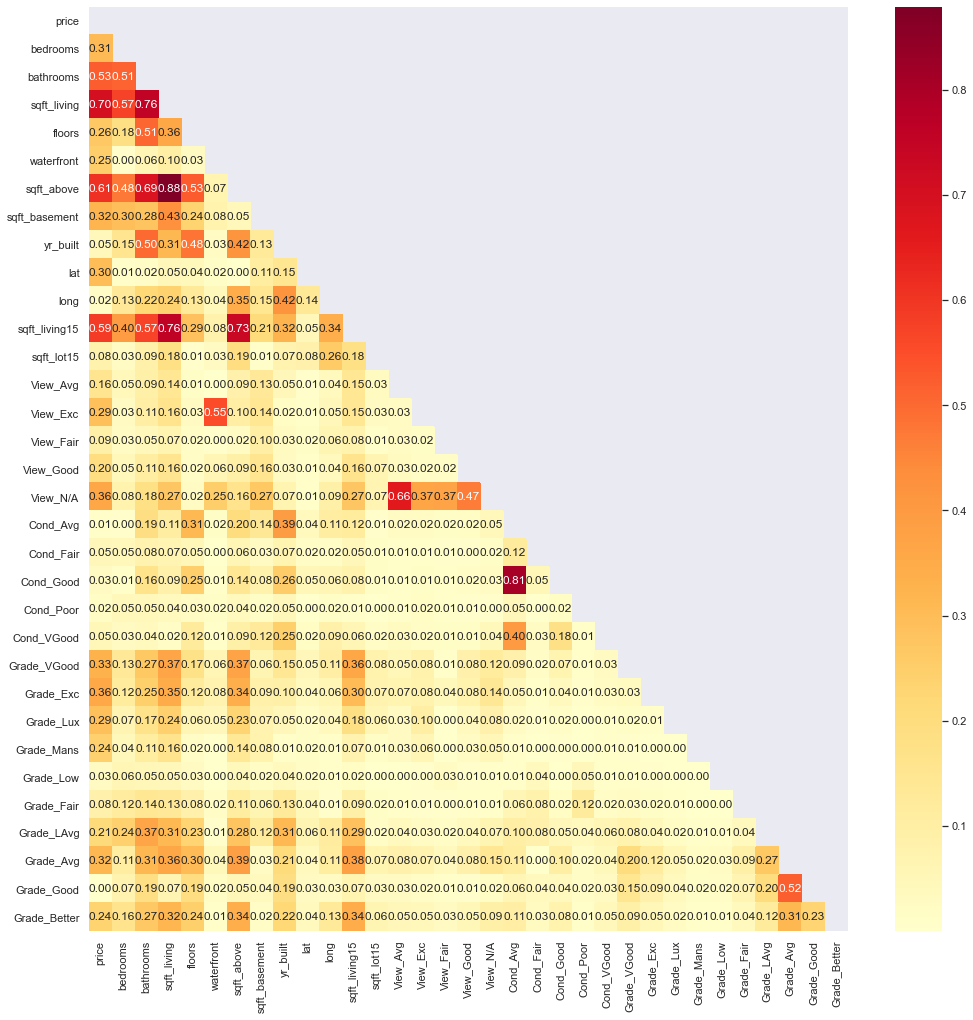

In [66]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_drop.corr(), dtype=bool))
sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_comparison.png', dpi=600);

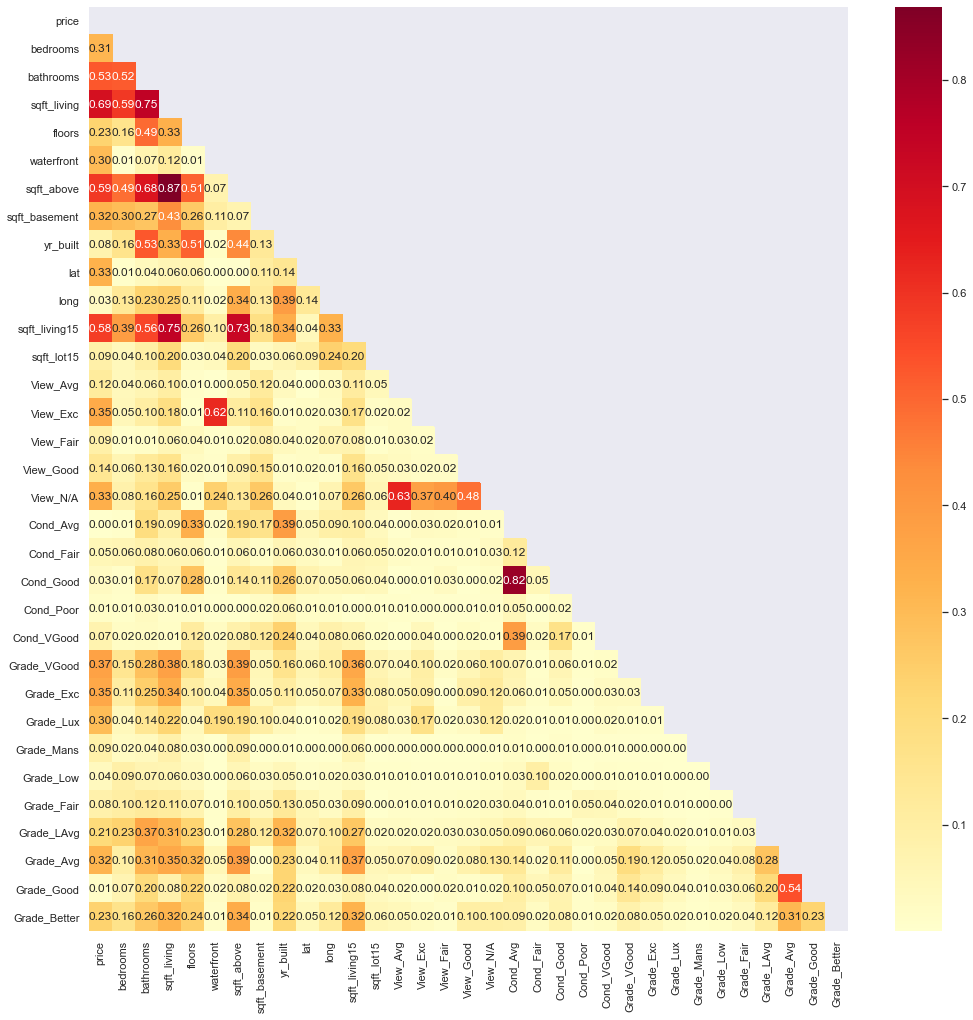

In [67]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_test_drop.corr(), dtype=bool))
sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_test_comparison.png', dpi=600);

## Linear Regression Time!!

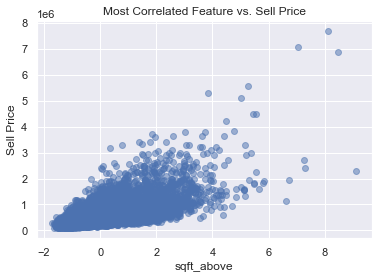

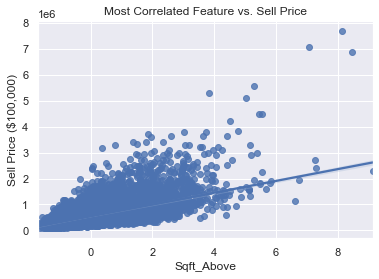

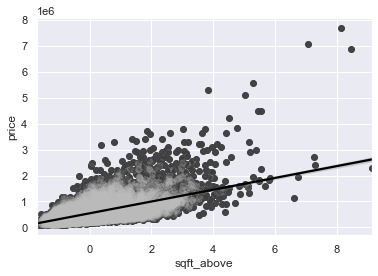

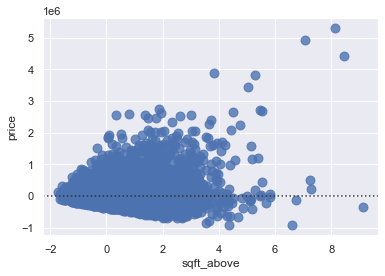

In [68]:
most_corr_feat = 'sqft_above'
fig, ax = plt.subplots()

ax.scatter(rename_drop[most_corr_feat], y_train, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat], y=y_train)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat],y=y_train, color="black")
ax3.scatter(rename_drop[most_corr_feat], y_train, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_drop[most_corr_feat], y=y_train,
              scatter_kws={"s": 80});

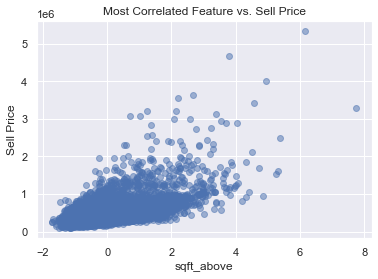

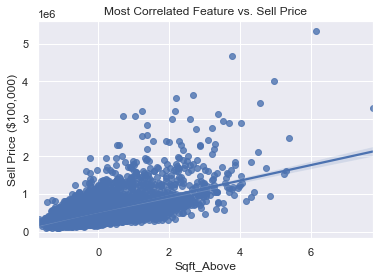

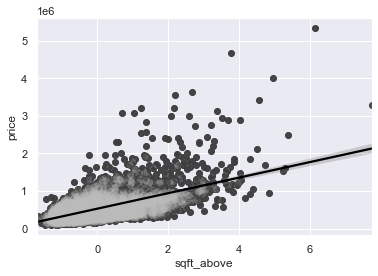

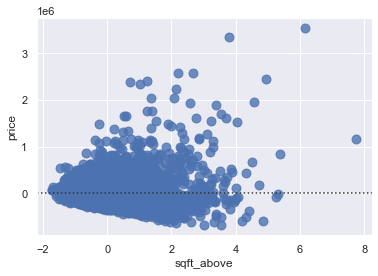

In [69]:
fig, ax = plt.subplots()

ax.scatter(rename_test_drop[most_corr_feat], y_test, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat], y=y_test)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat],y=y_test, color="black")
ax3.scatter(rename_test_drop[most_corr_feat], y_test, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear_test.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_test_drop[most_corr_feat], y=y_test,
              scatter_kws={"s": 80});

### "ShuffleSplit" cross validation scores using "Train" data

In [70]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_corr_feat]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.372788910332096
Validation score: 0.3695348366625604


### "ShuffleSplit" cross validation scores using "Test" data

In [71]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_test[[most_corr_feat]],
    y=y_test,
    return_train_score=True,
    cv=splitter
)

print("Test score:     ", baseline_scores["test_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Test score:      0.3627167905894609
Validation score: 0.3627167905894609


###  OLS Regression of all variables - messy, complex, and not useful:

In [72]:
sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1305.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:            -2.2008e+05
No. Observations:               16197   AIC:                         4.402e+05
Df Residuals:                   16162   BIC:                         4.405e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.93e+07   4.95e+06     -5.921      0.000    -3.9e+07   -1.96e+07
id            -6.996e-07   5.33e-07     -1.312      0.189   -1.74e-06    3.45e-07
bedrooms      -2.109e+04   2124.587     -9.929      0.000   -2.53e+04   -1.69e+04
bathrooms      4.246e+04   3588.552     11.831      0.000    3.54e+04    4.95e+04
sqft_living      87.0798     22.364      3.894      0.000      43.244     130.916
sqft_lot          0.1254      0.053      2.353      0.019       0.021       0.230
floors         3.255e+04   4059.087      8.018      0.000    2.46e+04    4.05e+04
waterfront     5.477e+05   2.19e+04     24.978      0.000    5.05e+05    5.91e+05
sqft_above       46.6901     22.443      2.080      0.038       2.700      90.680
sqft_basement    45.0306     22.389      2.011      0.044       1.145      88.916
yr_built      -2440.0099     77.342    -31.548      0.000   -2591.609   -2288.410
zipcode        -587.8625     36.761    -15.992      0.000    -659.918    -515.807
lat            6.106e+05   1.19e+04     51.288      0.000    5.87e+05    6.34e+05
long           -1.96e+05   1.47e+04    -13.314      0.000   -2.25e+05   -1.67e+05
sqft_living15    30.7391      3.874      7.934      0.000      23.145      38.333
sqft_lot15       -0.3789      0.079     -4.795      0.000      -0.534      -0.224
date_num        268.2818     33.146      8.094      0.000     203.313     333.251
basement_?     1.294e+04   1.22e+04      1.062      0.288   -1.09e+04    3.68e+04
AVERAGE       -5.909e+06    9.9e+05     -5.969      0.000   -7.85e+06   -3.97e+06
EXCELLENT     -5.737e+06    9.9e+05     -5.793      0.000   -7.68e+06    -3.8e+06
FAIR          -5.862e+06    9.9e+05     -5.920      0.000    -7.8e+06   -3.92e+06
GOOD           -5.82e+06    9.9e+05     -5.878      0.000   -7.76e+06   -3.88e+06
NONE          -5.979e+06    9.9e+05     -6.041      0.000   -7.92e+06   -4.04e+06
Average       -5.864e+06    9.9e+05     -5.922      0.000   -7.81e+06   -3.92e+06
Fair          -5.878e+06    9.9e+05     -5.935      0.000   -7.82e+06   -3.94e+06
Good          -5.839e+06    9.9e+05     -5.898      0.000   -7.78e+06    -3.9e+06
Poor          -5.929e+06   9.91e+05     -5.984      0.000   -7.87e+06   -3.99e+06
Very Good     -5.798e+06    9.9e+05     -5.859      0.000   -7.74e+06   -3.86e+06
10 Very Good   -3.05e+06   4.95e+05     -6.160      0.000   -4.02e+06   -2.08e+06
11 Excellent  -2.791e+06   4.95e+05     -5.635      0.000   -3.76e+06   -1.82e+06
12 Luxury     -2.331e+06   4.96e+05     -4.697      0.000    -3.3e+06   -1.36e+06
13 Mansion    -9.165e+05   4.99e+05     -1.838      0.066   -1.89e+06    6.07e+04
4 Low          -3.45e+06   4.96e+05     -6.954      0.000   -4.42e+06   -2.48e+06
5 Fair         -3.45e+06   4.95e+05     -6.969      0.000   -4.42e+06   -2.48e+06
6 Low Average -3.424e+06   4.95e+05     -6.917   

##  Narrowing it down to a one or two at a time:

In [73]:
formula = 'price ~ sqft_living'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.594e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:            -2.2522e+05
No. Observations:               16197   AIC:                         4.504e+05
Df Residuals:                   16195   BIC:                         4.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.44e+05   2079.671    261.579      0.000     5.4e+05    5.48e+05
sqft_living  2.626e+05   2079.671    126.261      0.000    2.59e+05    2.67e+05
==============================================================================
Omnibus:                    11437.576   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           466873.745
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.650   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     5084.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:            -2.2418e+05
No. Observations:               16197   AIC:                         4.484e+05
Df Residuals:                   16192   BIC:                         4.484e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.44e+05   1950.709    278.872      0.000     5.4e+05    5.48e+05
sqft_living  2.229e+05   2172.827    102.572      0.000    2.19e+05    2.27e+05
Grade_Exc    5.139e+04   2093.589     24.548      0.000    4.73e+04    5.55e+04
Grade_Lux    4.783e+04   2026.032     23.609      0.000    4.39e+04    5.18e+04
View_Exc     6.324e+04   1981.756     31.911      0.000    5.94e+04    6.71e+04
==============================================================================
Omnibus:                    10883.290   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           562949.183
Skew:                           2.614   Prob(JB):                         0.00
Kurtosis:                      31.405   Cond. No.                         1.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_test_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1732.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:                -74356.
No. Observations:                5399   AIC:                         1.487e+05
Df Residuals:                    5394   BIC:                         1.488e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.292e+05   3155.169    167.738      0.000    5.23e+05    5.35e+05
sqft_living  2.024e+05   3481.606     58.128      0.000    1.96e+05    2.09e+05
Grade_Exc    5.022e+04   3367.728     14.914      0.000    4.36e+04    5.68e+04
Grade_Lux    4.692e+04   3283.570     14.291      0.000    4.05e+04    5.34e+04
View_Exc     7.148e+04   3243.047     22.042      0.000    6.51e+04    7.78e+04
==============================================================================
Omnibus:                     2296.016   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23888.303
Skew:                           1.747   Prob(JB):                         0.00
Kurtosis:                      12.695   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  So I get best results, that I've been able to figure out, from price vs multivariate (sqft_living + Grade_Exc + Grade_Lux + View_Exc)  Best R2/AdjR2 I've found is 0.529 from the Training data, and 0.523 from the matching Test data. (all above)

In [76]:
formula = 'price ~ Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2204.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:            -2.2882e+05
No. Observations:               16197   AIC:                         4.576e+05
Df Residuals:                   16194   BIC:                         4.577e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.44e+05   2597.404    209.439      0.000    5.39e+05    5.49e+05
Grade_Exc   1.346e+05   2597.510     51.827      0.000     1.3e+05     1.4e+05
Grade_Lux    1.09e+05   2597.510     41.966      0.000    1.04e+05    1.14e+05
==============================================================================
Omnibus:                    14126.414   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1144663.484
Skew:                           3.802   Prob(JB):                         0.00
Kurtosis:                      43.476   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
formula = 'price ~ sqft_living15 + sqft_living + bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     4115.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:            -2.2509e+05
No. Observations:               16197   AIC:                         4.502e+05
Df Residuals:                   16192   BIC:                         4.502e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.44e+05   2063.202    263.667      0.000     5.4e+05    5.48e+05
sqft_living15  5.103e+04   3246.332     15.721      0.000    4.47e+04    5.74e+04
sqft_living    2.531e+05   5096.702     49.663      0.000    2.43e+05    2.63e+05
bathrooms     -5082.1177   3168.917     -1.604      0.109   -1.13e+04    1129.309
sqft_above    -2.895e+04   4440.104     -6.520      0.000   -3.77e+04   -2.02e+04
==============================================================================
Omnibus:                    12046.888   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           599443.927
Skew:                           3.084   Prob(JB):                         0.00
Kurtosis:                      32.158   Cond. No.                         5.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Below, we see that sqft_living correlates strongly with bathrooms and sqft_above, so these three should probably not be used together

In [78]:
formula = 'sqft_living ~ bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                 3.590e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:                -9275.4
No. Observations:               16197   AIC:                         1.856e+04
Df Residuals:                   16194   BIC:                         1.858e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.334e-16      0.003   6.92e-14      1.000      -0.007       0.007
bathrooms      0.2882      0.005     61.926      0.000       0.279       0.297
sqft_above     0.6801      0.005    146.112      0.000       0.671       0.689
==============================================================================
Omnibus:                     4055.291   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10463.133
Skew:                           1.360   Prob(JB):                         0.00
Kurtosis:                       5.848   Cond. No.                         2.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
formula = 'sqft_living ~ View_Exc + Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1299.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:18   Log-Likelihood:                -21236.
No. Observations:               16197   AIC:                         4.248e+04
Df Residuals:                   16193   BIC:                         4.251e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.193e-16      0.007   3.11e-14      1.000      -0.014       0.014
View_Exc       0.1108      0.007     15.570      0.000       0.097       0.125
Grade_Exc      0.3425      0.007     48.387      0.000       0.329       0.356
Grade_Lux      0.2339      0.007     32.980      0.000       0.220       0.248
==============================================================================
Omnibus:                     3583.424   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12108.827
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       6.613   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Just checking the VIF of this:

In [80]:
vif = [variance_inflation_factor(rename_drop.values,i) for i in range(rename_drop.shape[1])]
pd.Series(vif, index=rename_drop.columns, name = "Variance Inflation Factor")

price              1.302939
bedrooms           1.705050
bathrooms          3.350301
sqft_living      137.941952
floors             2.055801
waterfront         1.468901
sqft_above       112.464725
sqft_basement     30.492059
yr_built           2.232273
lat                1.141410
long               1.525768
sqft_living15      3.043156
sqft_lot15         1.127470
View_Avg                inf
View_Exc                inf
View_Fair               inf
View_Good               inf
View_N/A                inf
Cond_Avg                inf
Cond_Fair               inf
Cond_Good               inf
Cond_Poor               inf
Cond_VGood              inf
Grade_VGood             inf
Grade_Exc               inf
Grade_Lux               inf
Grade_Mans              inf
Grade_Low               inf
Grade_Fair              inf
Grade_LAvg              inf
Grade_Avg               inf
Grade_Good              inf
Grade_Better            inf
Name: Variance Inflation Factor, dtype: float64

####  NOT GOOD!!  We don't want any values > 5, and 3 of these are, so we may have too much multicollinearity.